In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [3]:
df = pd.read_csv("/Mall_Customers.csv")
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# Step 2: Data Exploration
# Display the first few rows to understand the structure of the data
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
# Step 3: Data Preprocessing
# Check for missing values
print(df.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:


# Get the actual column names and print them to verify
print(df.columns)

# Drop the 'CustomerID' column (if it exists) using the correct case
if 'CustomerID' in df.columns:
    df = df.drop(columns=['CustomerID'])
else:
    print("Warning: 'CustomerID' column not found in DataFrame.")

# Convert 'Gender' to numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Check for duplicates and remove them
df = df.drop_duplicates()

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


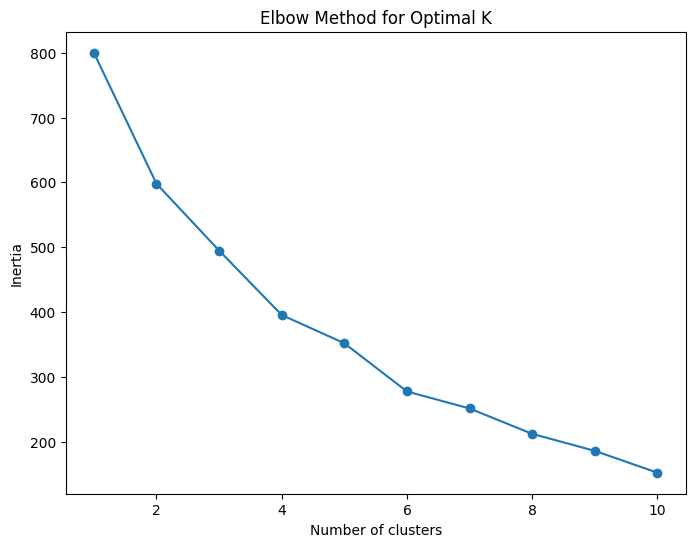

In [8]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


In [10]:
# Centroids in scaled form
centroids = kmeans.cluster_centers_

# Convert centroids back to the original scale
centroids_original = scaler.inverse_transform(centroids)

# Create a DataFrame for the centroids
centroids_df = pd.DataFrame(centroids_original, columns=df.columns[:-1])  # Exclude 'Cluster'
print("\nCluster Centroids (Original Scale):")
print(centroids_df)



Cluster Centroids (Original Scale):
     Gender        Age  Annual Income (k$)  Spending Score (1-100)
0  0.490196  56.470588           46.098039               39.313725
1  0.000000  39.500000           85.150000               14.050000
2  0.000000  28.690476           60.904762               70.238095
3  1.000000  37.897959           82.122449               54.448980
4  1.000000  27.315789           38.842105               56.210526


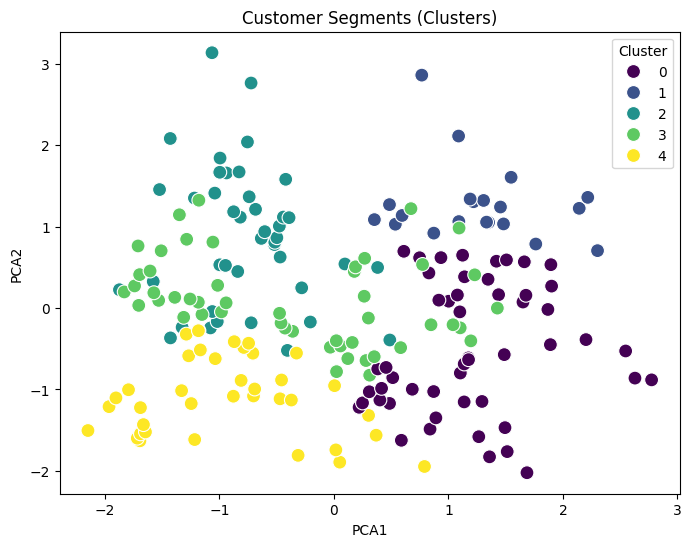

In [11]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA components and cluster labels
df_pca = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=100)
plt.title('Customer Segments (Clusters)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()


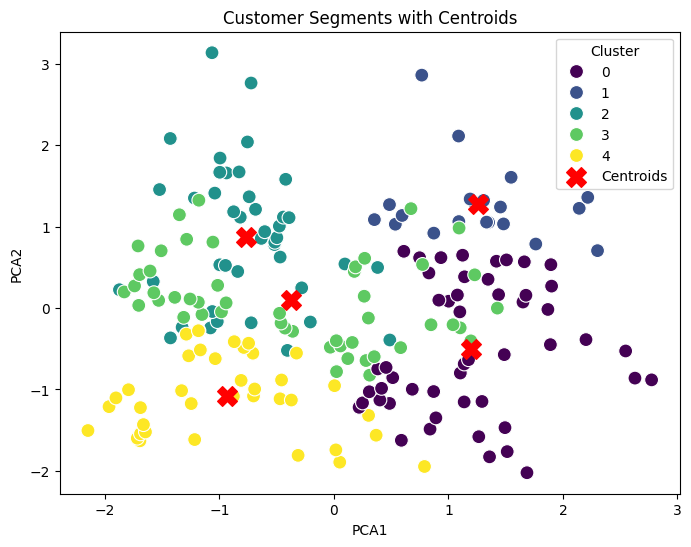

In [12]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Add PCA components and cluster labels to a DataFrame
df_pca = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']

# Reduce centroids to 2D using PCA
centroids_pca = pca.transform(centroids)

# Plot clusters with centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=100)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Customer Segments with Centroids')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()



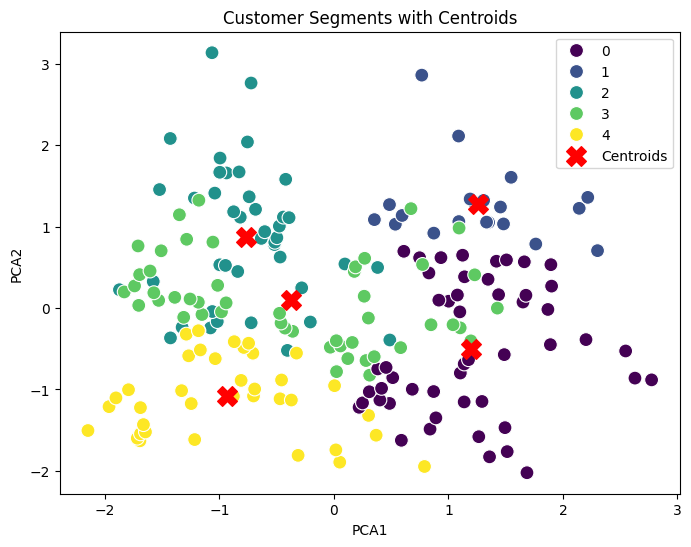

In [13]:
# Reduce centroids to 2D using PCA
centroids_pca = pca.transform(centroids)

# Plot clusters with centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=100)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Customer Segments with Centroids')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


In [14]:
# Checking the explained variance ratio of the first two components
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.33690046 0.26230645]


In [15]:
'''purpose of the Mall Customer Segmentation Code
This project aims to analyze customer behavior and group customers into distinct segments (clusters) based on shared characteristics like age, gender, annual income, and spending score. By using K-Means clustering, the business can gain actionable insights for personalized marketing, resource optimization, and enhancing customer experience.

Benefits of the Project
Improved Marketing Strategies:

Tailored promotions for specific customer groups, increasing engagement and ROI.
Identify high-value customers and target them with loyalty programs.
Enhanced Customer Experience:

Understand customer needs better and design services/products accordingly.
Offer exclusive deals to the right audience (e.g., high spenders or loyal customers).
Operational Efficiency:

Focus resources (staffing, inventory) on the most profitable customer segments.
Optimize mall layouts or store locations based on customer demographics.
Revenue Growth:

Upsell and cross-sell to customers based on their segment characteristics.
Retain high-spending customers by offering value-added services.
Data-Driven Decision-Making:

Move away from guesswork and rely on clear patterns in customer data.
Segment analysis helps management identify trends and gaps.
Best Insights from the Project
After performing the segmentation, the following are typical insights:

Cluster 1: High Spenders

Characteristics: High income, high spending score.
Insights: Represents premium customers who are willing to spend more. Focus on luxury products and exclusive offers.
Actionable Strategy: Design loyalty programs, offer VIP services, and stock premium products.
Cluster 2: Budget-Conscious Shoppers

Characteristics: Low income, moderate spending score.
Insights: Prefer affordable products and discounts.
Actionable Strategy: Use discounts, value bundles, or promotions to retain these customers.
Cluster 3: Young Shoppers

Characteristics: Younger age group, moderate income, high spending score.
Insights: Likely influenced by trends and brand marketing.
Actionable Strategy: Advertise through social media, offer trendy and seasonal products.
Cluster 4: Low-Value Customers

Characteristics: Low income, low spending score.
Insights: Represents customers with limited spending capacity.
Actionable Strategy: Focus on affordability, essentials, or basic services.
Cluster 5: Average Spenders

Characteristics: Moderate income and spending score.
Insights: Stable customers who shop occasionally.
Actionable Strategy: Use targeted promotions to convert them into loyal customers.
Summary of the Project
Objective: To segment customers into distinct groups based on demographic and behavioral data.
Methods:
Data preprocessing (e.g., handling missing values, encoding gender).
Scaling the features for uniformity.
Identifying the optimal number of clusters using the Elbow Method.
Performing K-Means clustering to segment customers.
Visualizing clusters using PCA to identify patterns.
Results:
Customers grouped into 5 distinct clusters.
Centroids identified for each cluster, representing the average profile.
Insights derived about customer behaviors for business strategy.
Benefits:
Enables personalized marketing and improves customer retention.
Optimizes resource allocation and increases profitability.
Provides clear, actionable data for strategic decision-making.
Example Insights (Hypothetical Data)
Cluster	Age	Income (k$)	Spending Score	Key Insight
0	25-30	55-65	75-85	Young, trendy shoppers; high spending.
1	40-50	70-90	35-45	Affluent but conservative spenders.
2	20-25	20-30	50-60	Budget-conscious young customers.
3	35-45	90-100	15-25	High income, low spending; value seekers.
4	25-35	80-90	80-90	High-income, frequent spenders; VIP segment.'''

'purpose of the Mall Customer Segmentation Code\nThis project aims to analyze customer behavior and group customers into distinct segments (clusters) based on shared characteristics like age, gender, annual income, and spending score. By using K-Means clustering, the business can gain actionable insights for personalized marketing, resource optimization, and enhancing customer experience.\n\nBenefits of the Project\nImproved Marketing Strategies:\n\nTailored promotions for specific customer groups, increasing engagement and ROI.\nIdentify high-value customers and target them with loyalty programs.\nEnhanced Customer Experience:\n\nUnderstand customer needs better and design services/products accordingly.\nOffer exclusive deals to the right audience (e.g., high spenders or loyal customers).\nOperational Efficiency:\n\nFocus resources (staffing, inventory) on the most profitable customer segments.\nOptimize mall layouts or store locations based on customer demographics.\nRevenue Growth:\